In [ ]:
# Tutorial de Extração de Componentes Principais de Discriminação no banco sintético

# Autor: Natanael Junior (natmourajr@gmail.com)
# Laboratorio de Processamento de Sinais - UFRJ

In [57]:
# Import Libs
import time
init_time = time.time()

import os
import pickle
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 20

current_time = time.time()
print 'Time to import libraries: %1.3f seconds'%(current_time-init_time)

Time to import libraries: 0.004 seconds


Time to create data: 0.008 seconds


(-5, 5)

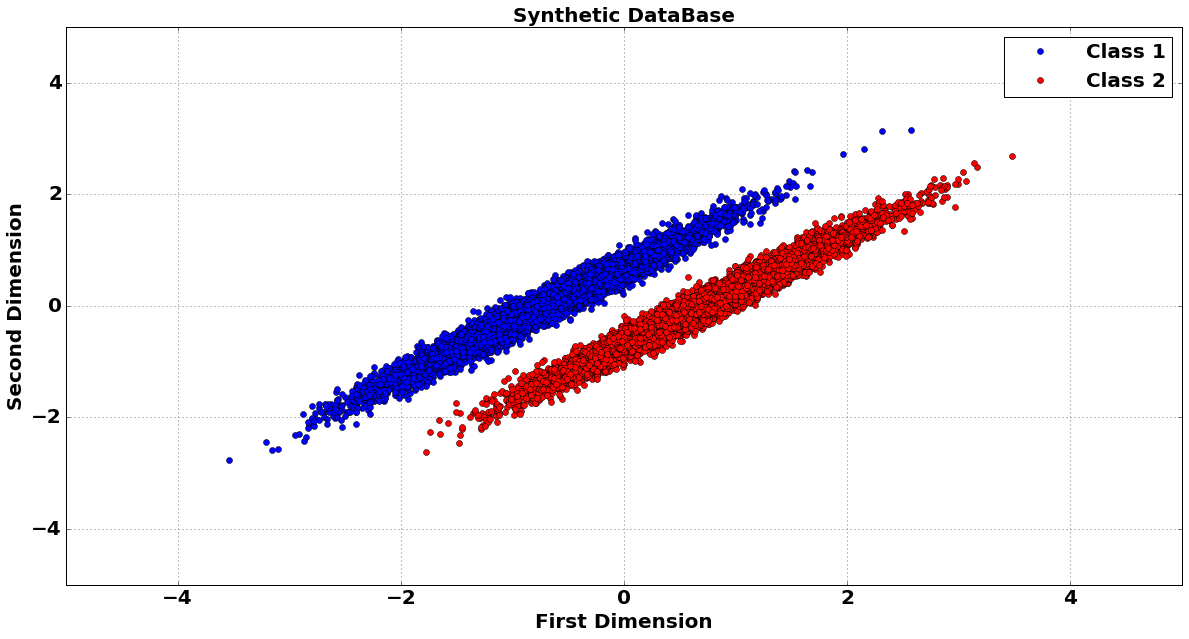

In [71]:
# Create Data

init_time = time.time()

# dados em 45^o
rotation_matrix = [[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]]

m_means = [-0.5,0.5]
m_vars = [1,0.1]

data_c1 = m_vars*np.random.randn(10000,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)


m_means = [0.5,-0.5]
m_vars = [1,0.1]

data_c2 = m_vars*np.random.randn(10000,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

data = np.append(data_c1, data_c2,axis=0)
trgt = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

current_time = time.time()
print 'Time to create data: %1.3f seconds'%(current_time-init_time)

# plot data
%matplotlib inline  

fig = plt.figure(figsize=(20,10))

plt.plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
plt.plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')

plt.legend()
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=20)
plt.xlabel('First Dimension',fontweight='bold',fontsize=20)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=20)
limits = [-5, 5]
plt.xlim(limits)
plt.ylim(limits)

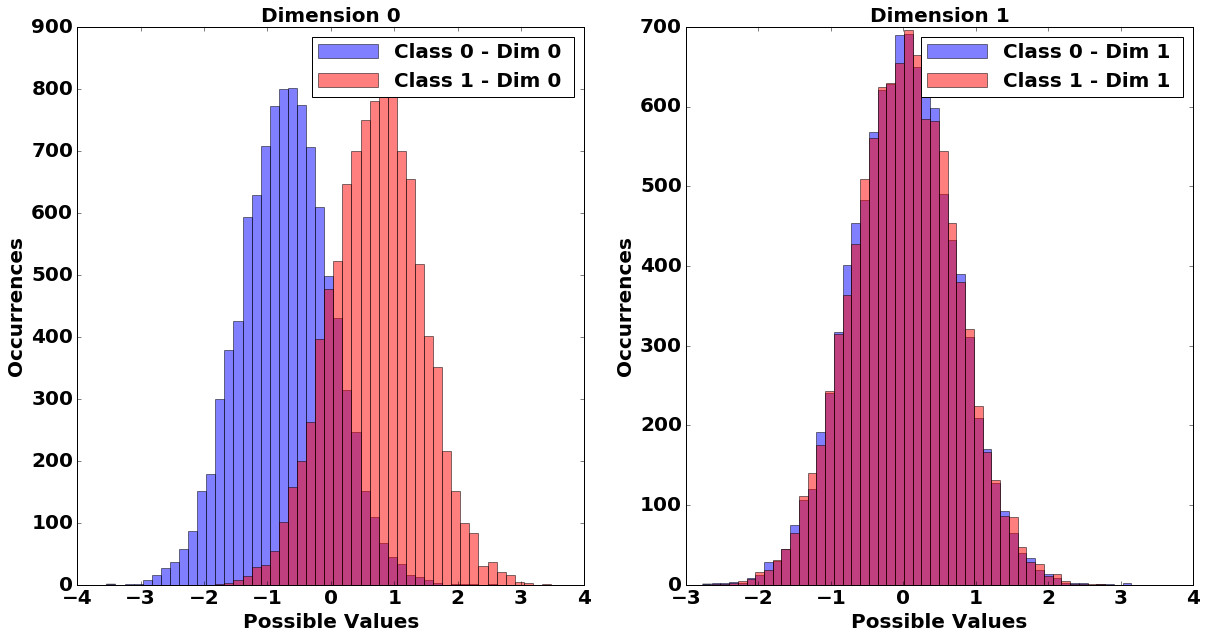

In [92]:
# Plot Distributions
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10),nrows=1, ncols=data.shape[1])

m_colors = ['b','r']

for iclass in range(2):
    for idim in range(data.shape[1]):
        n_bins = np.linspace(data[:,idim].min(),data[:,idim].max(),50)
        n, bins, patches = ax[idim].hist(data[trgt==iclass,idim],
                                                 bins=n_bins,fc=m_colors[iclass],
                                                 alpha=0.5,label='Class %i - Dim %i '%(iclass,idim))
        ax[idim].legend(loc='best')
        ax[idim].grid()
        
        ax[idim].set_title('Dimension %i'%(idim),fontsize=20,fontweight='bold')
        ax[idim].set_xlabel('Possible Values',fontsize=20,fontweight='bold')
        ax[idim].set_ylabel('Occurrences',fontsize=20,fontweight='bold')



(-5, 5)

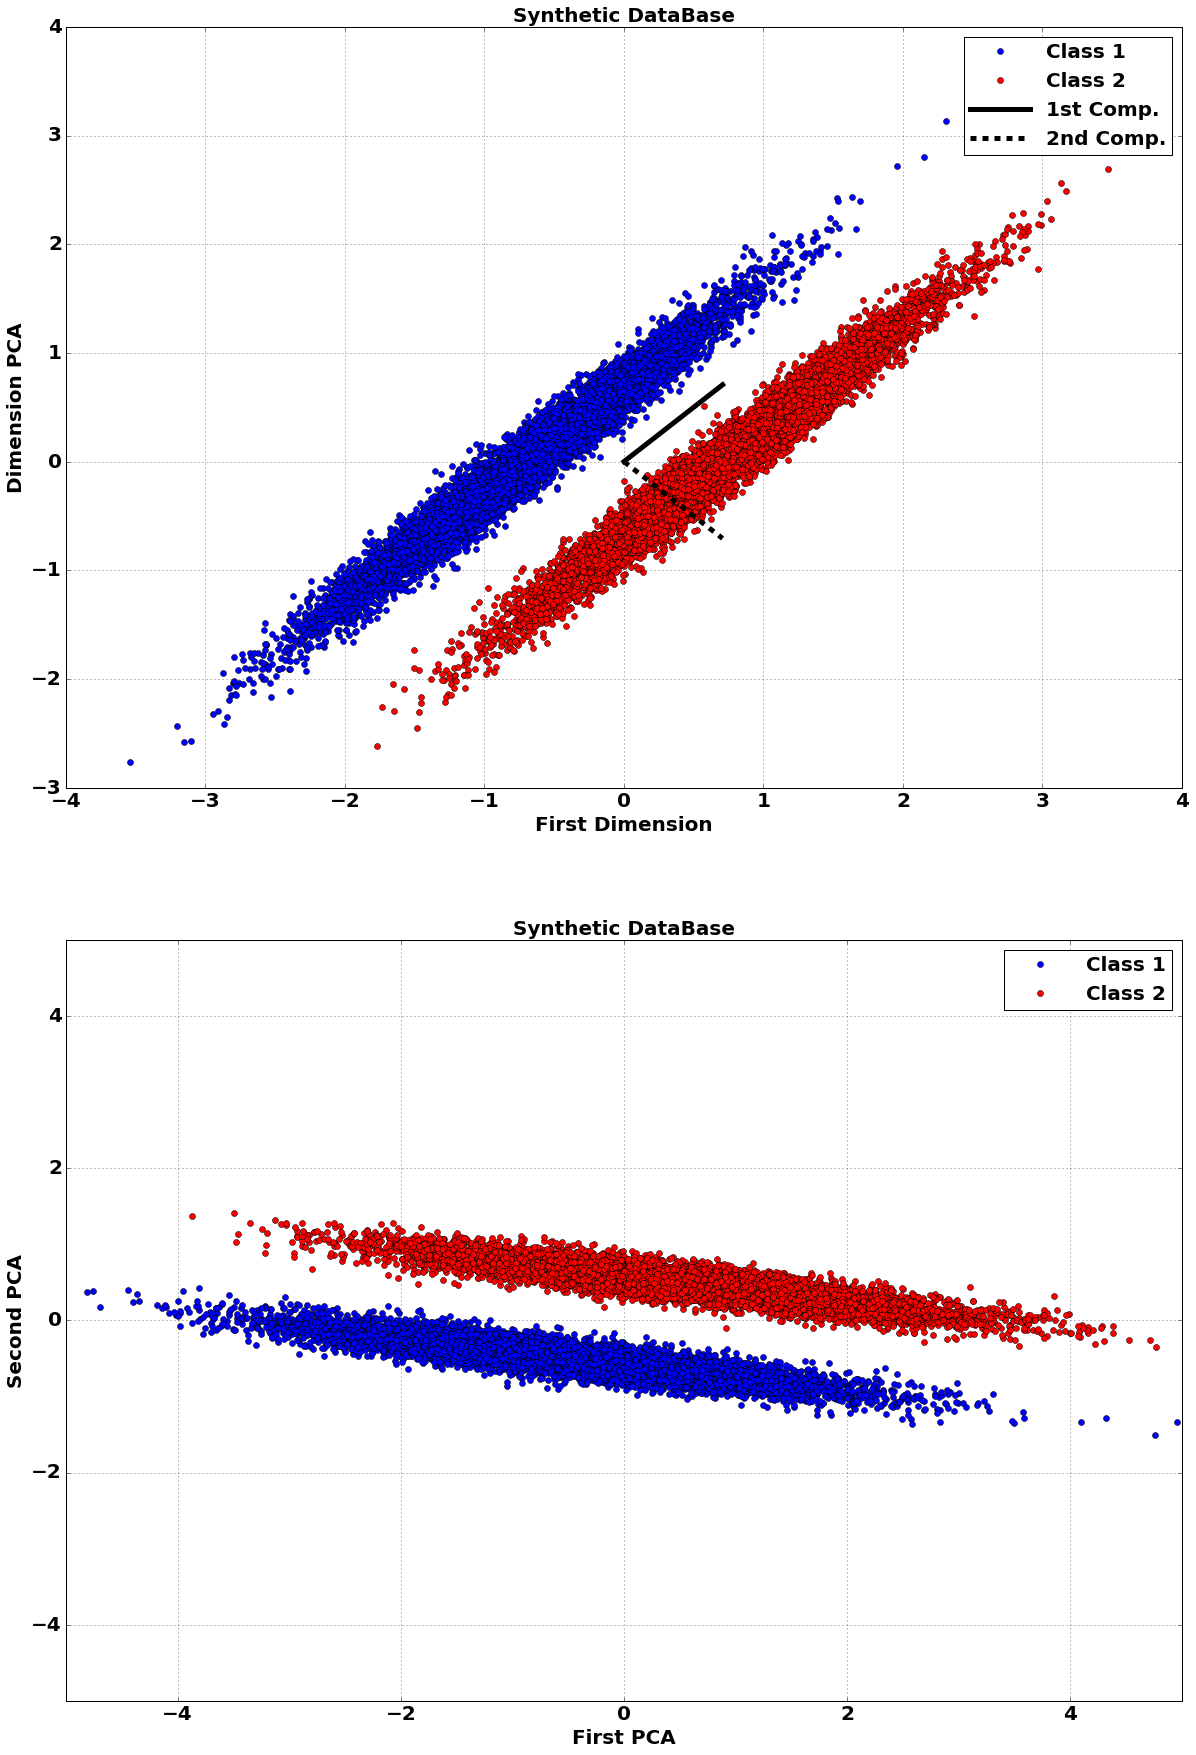

In [117]:
# PCA Decomp.

from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn import preprocessing

CVO = cross_validation.StratifiedKFold(trgt, 10)
CVO = list(CVO)

train_id, test_id = CVO[0]

norm = 'mapstd'

# normalize data based in train set
if norm == 'mapstd':
    scaler = preprocessing.StandardScaler().fit(data[train_id,:])
elif norm == 'mapstd_rob':
    scaler = preprocessing.RobustScaler().fit(data[train_id,:])
elif norm == 'mapminmax':
    scaler = preprocessing.MinMaxScaler().fit(data[train_id,:])
        
if norm == 'none':
    norm_data = data
else:
    norm_data = scaler.transform(data)
    
pca = PCA(n_components=norm_data.shape[1])
pca.fit(norm_data[train_id,:])
pca_energy = pca.explained_variance_/np.sum(pca.explained_variance_)

proj_norm_data = pca.transform(norm_data)


# plot data
%matplotlib inline  


fig, ax = plt.subplots(figsize=(20,30),nrows=2, ncols=1)

ax[0].plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
ax[0].plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')


ax[0].plot([0,pca.components_[0,0]],[0,pca.components_[0,1]],'k-',linewidth=5.0,label='1st Comp.')
ax[0].plot([0,pca.components_[1,0]],[0,pca.components_[1,1]],'k--',linewidth=5.0,label='2nd Comp.')


ax[0].legend()
ax[0].grid()
ax[0].set_title('Synthetic DataBase',fontweight='bold',fontsize=20)
ax[0].set_xlabel('First Dimension',fontweight='bold',fontsize=20)
ax[0].set_ylabel('Dimension PCA',fontweight='bold',fontsize=20)


ax[1].plot(proj_norm_data[trgt==0,0],proj_norm_data[trgt==0,1],'bo',label='Class 1')
ax[1].plot(proj_norm_data[trgt==1,0],proj_norm_data[trgt==1,1],'ro',label='Class 2')

ax[1].legend()
ax[1].grid()
ax[1].set_title('Synthetic DataBase',fontweight='bold',fontsize=20)
ax[1].set_xlabel('First PCA',fontweight='bold',fontsize=20)
ax[1].set_ylabel('Second PCA',fontweight='bold',fontsize=20)

limits = [-5, 5]
ax[1].set_xlim(limits)
ax[1].set_ylim(limits)


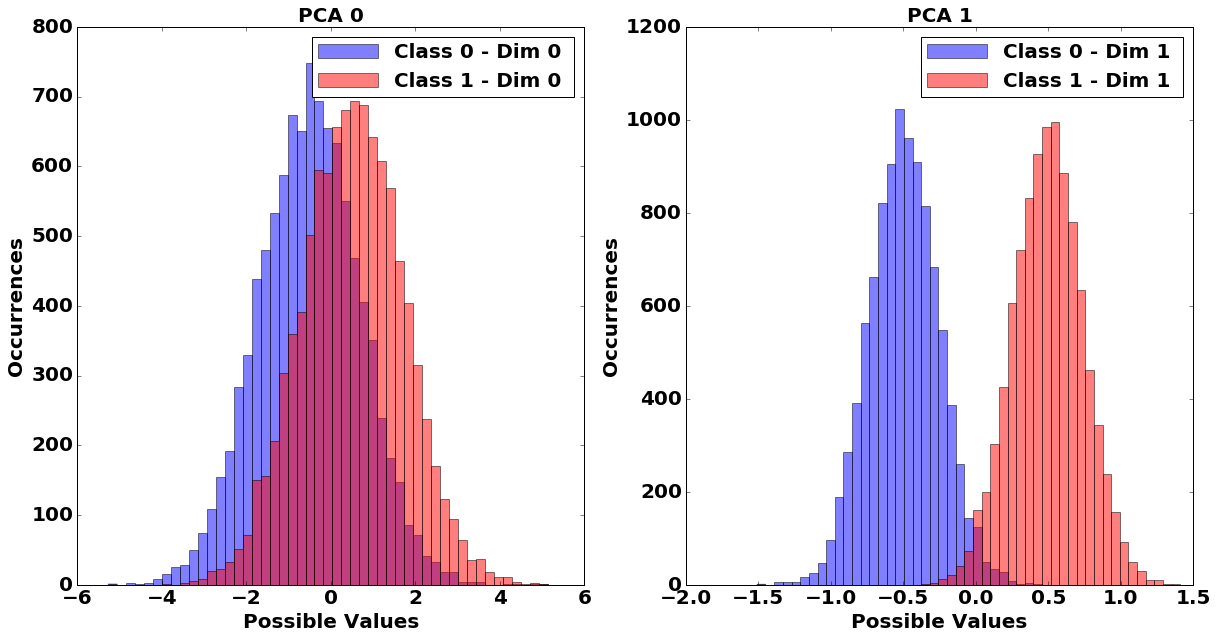

In [91]:
# Plot Distributions
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10),nrows=1, ncols=proj_norm_data.shape[1])

m_colors = ['b','r']

for iclass in range(2):
    for idim in range(proj_norm_data.shape[1]):
        n_bins = np.linspace(proj_norm_data[:,idim].min(),proj_norm_data[:,idim].max(),50)
        n, bins, patches = ax[idim].hist(proj_norm_data[trgt==iclass,idim],
                                                 bins=n_bins,fc=m_colors[iclass],
                                                 alpha=0.5,label='Class %i - Dim %i '%(iclass,idim))
        ax[idim].legend(loc='best')
        ax[idim].grid()
        ax[idim].set_title('PCA %i'%(idim),fontsize=20,fontweight='bold')
        ax[idim].set_xlabel('Possible Values',fontsize=20,fontweight='bold')
        ax[idim].set_ylabel('Occurrences',fontsize=20,fontweight='bold')


0.70710678118654602